In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.datasets import load_iris

In [18]:
x,y = load_iris(return_X_y=True)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(x, columns=feature_names)
df['target'] = y

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
target           3
dtype: int64

### Plot the pariplot

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

This is a high-level interface for PairGrid that is intended to
make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.

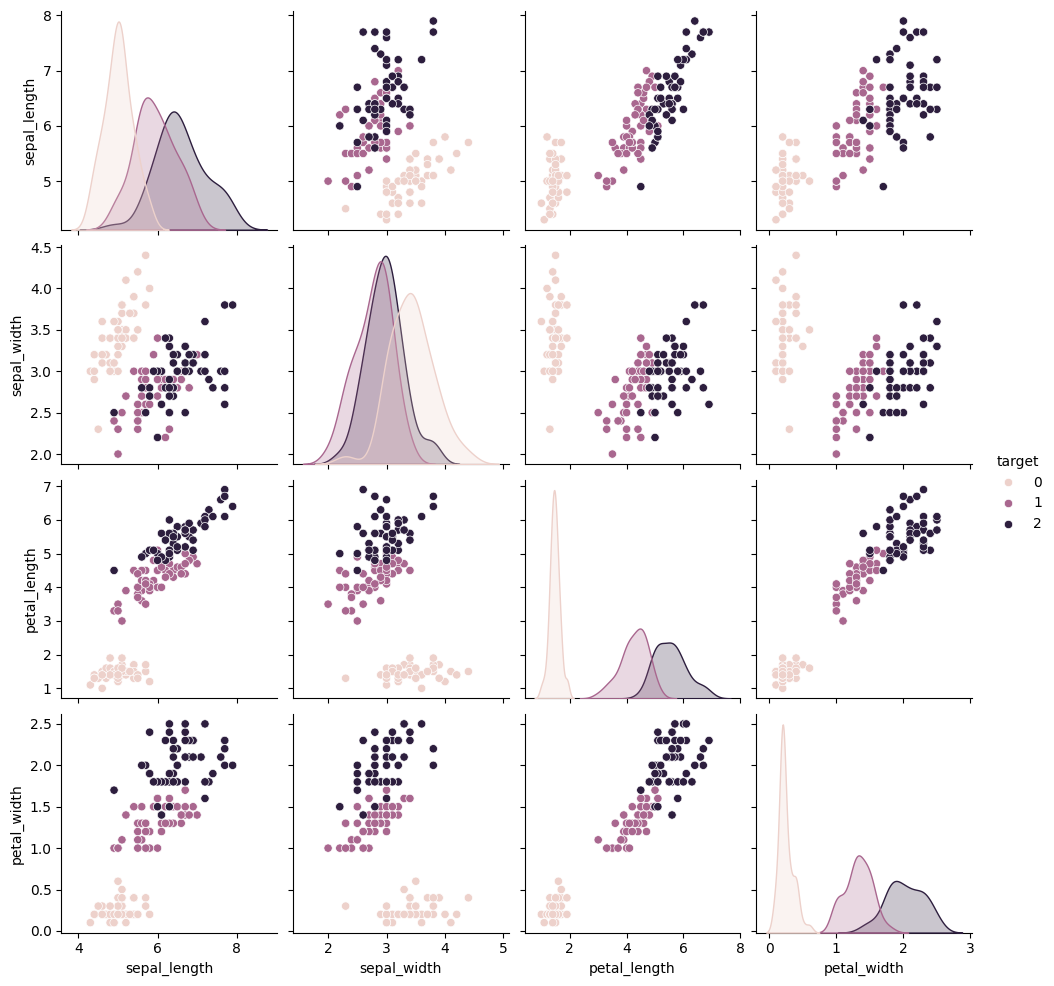

In [21]:
sns.pairplot(data = df, hue = 'target')

In [22]:
df = df.drop(columns=['petal_length'])
df = df[df['target'] != 0]
x = df.iloc[ : , :-1]
print(type(x))
y = df.iloc[ :, -1]
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [23]:
x_train, x_test, y_trian, y_test = train_test_split(x,y, test_size= 0.2, random_state= 12)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [25]:
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

In [26]:
estimator = [('lr', lr), ('rf', rf), ('svc', svc), ('knn', knn) ]

In [27]:
for est in estimator:
    A = cross_val_score(est[1], x,y, cv = 10, scoring= 'accuracy')
    print(est[0], np.round(np.mean(A), 2))


lr 0.93
rf 0.91
svc 0.93
knn 0.93


In [28]:
from sklearn.ensemble import VotingClassifier

### Hard Voting 

In [29]:
vc_hard = VotingClassifier(estimators=estimator, voting ='hard')
A = cross_val_score(vc_hard, x, y, cv = 10, scoring='accuracy')
print( np.round(np.mean(A), 2))

0.93


### Soft Voting

In [30]:
vc_soft = VotingClassifier(estimators=estimator, voting ='soft')
B = cross_val_score(vc_soft, x, y, cv = 10, scoring='accuracy')
print( np.round(np.mean(B), 2))

0.94


### Weighted Voting

We can set the weights to the algorithms used in voting ensemble algorithms.

Have a look.

In [33]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
         for l in range(1,4):
            vc_soft = VotingClassifier(estimators=estimator, voting ='soft', weights=[i,j,k, l])
            B = cross_val_score(vc_soft, x, y, cv = 10, scoring='accuracy')
            print( "for", i , j, k , l , " ---> " , np.round(np.mean(B), 2))


for 1 1 1 1  --->  0.94
for 1 1 1 2  --->  0.94
for 1 1 1 3  --->  0.93
for 1 1 2 1  --->  0.94
for 1 1 2 2  --->  0.94
for 1 1 2 3  --->  0.93
for 1 1 3 1  --->  0.94
for 1 1 3 2  --->  0.94
for 1 1 3 3  --->  0.94
for 1 2 1 1  --->  0.94
for 1 2 1 2  --->  0.94
for 1 2 1 3  --->  0.93
for 1 2 2 1  --->  0.94
for 1 2 2 2  --->  0.94
for 1 2 2 3  --->  0.94
for 1 2 3 1  --->  0.94
for 1 2 3 2  --->  0.94
for 1 2 3 3  --->  0.93
for 1 3 1 1  --->  0.92
for 1 3 1 2  --->  0.93
for 1 3 1 3  --->  0.94
for 1 3 2 1  --->  0.94
for 1 3 2 2  --->  0.93
for 1 3 2 3  --->  0.94
for 1 3 3 1  --->  0.94
for 1 3 3 2  --->  0.94
for 1 3 3 3  --->  0.94
for 2 1 1 1  --->  0.94
for 2 1 1 2  --->  0.94
for 2 1 1 3  --->  0.93
for 2 1 2 1  --->  0.94
for 2 1 2 2  --->  0.94
for 2 1 2 3  --->  0.93
for 2 1 3 1  --->  0.94
for 2 1 3 2  --->  0.94
for 2 1 3 3  --->  0.94
for 2 2 1 1  --->  0.94
for 2 2 1 2  --->  0.94
for 2 2 1 3  --->  0.94
for 2 2 2 1  --->  0.94
for 2 2 2 2  --->  0.94
for 2 2 2 3  ---